# Mini Project Data Science: Analysis of Google PlayStore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv("/tmp/googleplaystore.csv")
data.dropna(inplace=True)#removes all the rows with atleast one null value,inplace is like conformation

In [ ]:
data.shape

(9360, 13)

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data.describe()

,Rating
count,9360.000000
mean,4.191838
std,0.515263
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [ ]:
print("cleaning review column:-")

cleaning review column:-


In [ ]:
"""
data of Reviews has string M in it i stands for million
we have to remove the string "M" and "," from values and 
miltiply with 1000000 if the values has 'M' in it
finaly convert to int

this method can clean the Reviewa column 
"""
def filter(per):
    if "M" in str(per) and "," in str(per):
        per = str(per).replace("M","")
        per = per.replace(",","")
        return int(per)*1000000
    elif "M" in str(per):
        per = int(str(per).replace("M",""))
        return per*1000000
    elif "," in str(per):
        per = str(per).replace(",","")
        return int(per)
    
    else:  
        return int(per)

In [ ]:
data["Reviews"] =data["Reviews"].apply(filter) # all the values of column 'Reviews' are passed to filter method

In [ ]:
print("cleaning size column:-")

cleaning size column:-


In [ ]:
def filter1(per):
    per = str(per)
    if "M" in per:
        per = per.replace("M","")
        return float(per)
    elif per == "Varies with device":
        return np.NaN
    elif "k" in per:
        return float(per.replace("k",""))/1000
    else:
        return float(per)

In [ ]:
data["Size"]=data["Size"].apply(filter1) #used to apply filter1 function 

In [ ]:
print("cleaning install column:-")

cleaning install column:-


In [ ]:
"""
thid function is used to clean instals column
it remones i]the string "+" and ","
and returns as intiger
"""
def filter2(per):
    per = str(per)
    if "+" in per:
        per = per.replace("+","")
    if "," in per:
        per = per.replace(",","")
        
    return int(per)

In [ ]:
data["Installs"]=data["Installs"].apply(filter2)# used to apply filter2 function"

In [ ]:
#cleaning price column
"""
used to remove the string "$"
and convert thr price to rupies as floats
"""
def filter3(per):
    per = str(per)
    if "$" in per:
        per=per.split("$")[1]
    return (float(per)*69.44)

In [ ]:
data["Price"]=data["Price"].apply(filter3)# used to apply filter 3 function

In [ ]:
print("DATA VISULIZATION:")

DATA VISULIZATION:


In [ ]:
import plotly
print(plotly.__version__)
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

4.4.1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



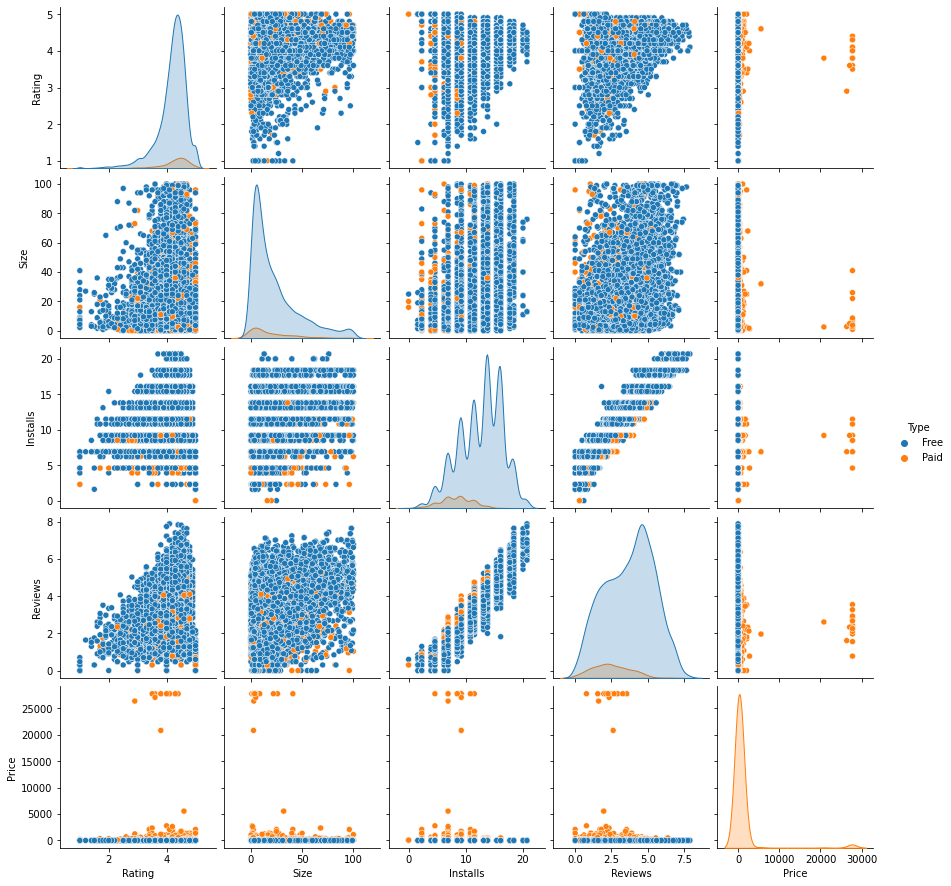

In [ ]:
sns.pairplot(pd.DataFrame(list(zip(data["Rating"],data["Size"], np.log(data["Installs"]), np.log10(data["Reviews"]),data["Type"], data["Price"])), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type')

In [ ]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068133,0.083640,0.051337,-0.021919
Reviews,0.068133,1.000000,0.240382,0.641605,-0.009824
Size,0.083640,0.240382,1.000000,0.162707,-0.026272
Installs,0.051337,0.641605,0.162707,1.000000,-0.011895
Price,-0.021919,-0.009824,-0.026272,-0.011895,1.000000


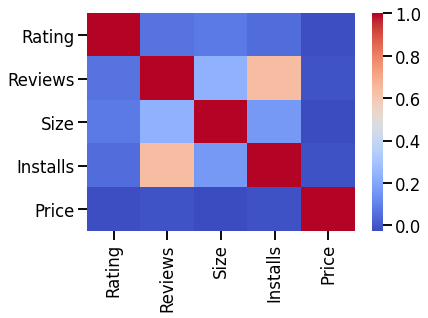

In [ ]:
sns.heatmap(data.corr(),cmap='coolwarm')

In [ ]:
print('Average app rating = ', np.mean(data['Rating']))


Average app rating =  4.191837606837612


In [ ]:
#print('Junk apps priced above  25000')
data[['Category', 'App',"Price"]][data.Price > 200*64]

,Category,App,Price
4197,FAMILY,most expensive app (H),27775.3056
4362,LIFESTYLE,💎 I'm rich,27775.3056
4367,LIFESTYLE,I'm Rich - Trump Edition,27776.0000
5351,LIFESTYLE,I am rich,27775.3056
5354,FAMILY,I am Rich Plus,27775.3056
5355,LIFESTYLE,I am rich VIP,20831.3056
5356,FINANCE,I Am Rich Premium,27775.3056
5357,LIFESTYLE,I am extremely Rich,26386.5056
5358,FINANCE,I am Rich!,27775.3056
5359,FINANCE,I am rich(premium),27775.3056


In [ ]:
temp=pd.DataFrame(data["Content Rating"].value_counts()).reset_index()
temp.columns=['user', 'Content Rating']

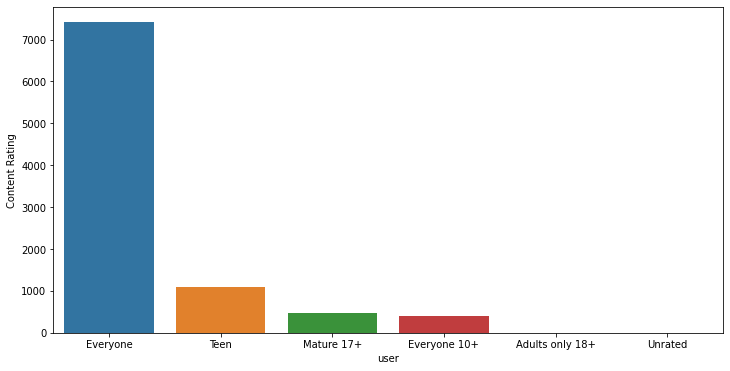

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=temp,x="user",y="Content Rating")

Text(0.5, 1.0, "Android Version's available")

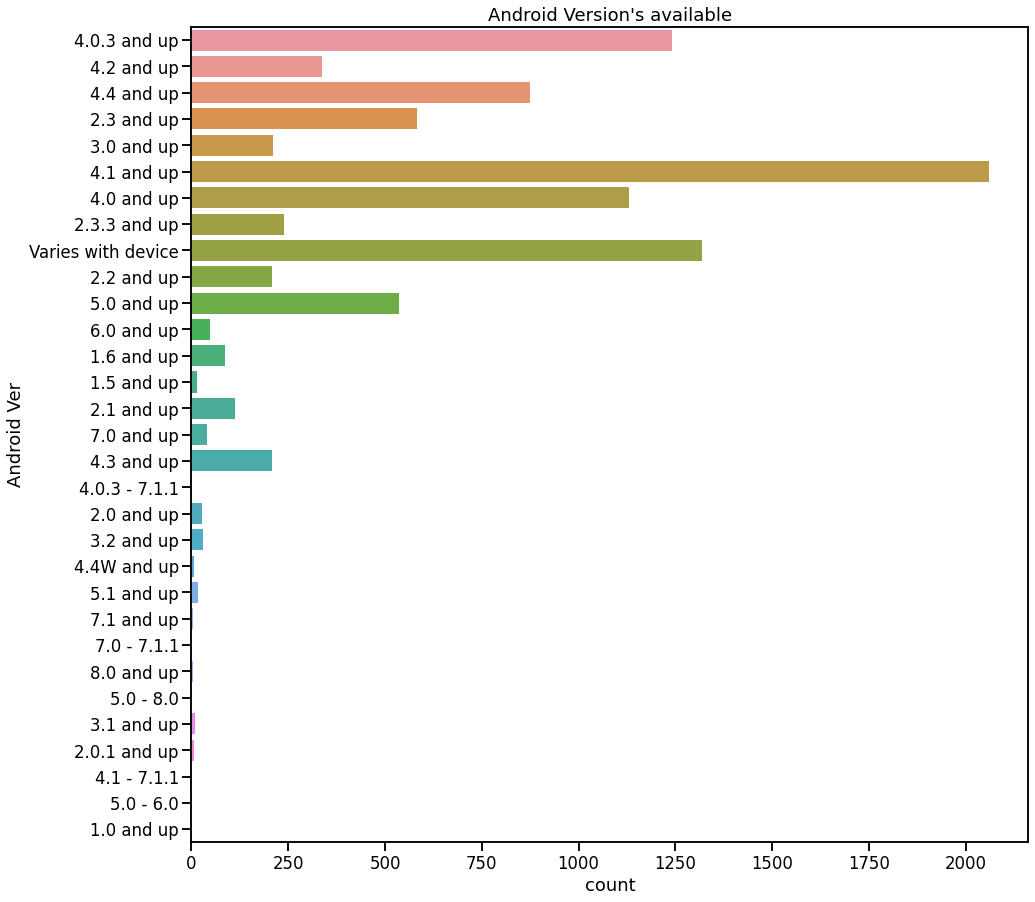

In [ ]:
#Android Version of the most available apps
plt.figure(figsize=(15,15))
sns.countplot(y='Android Ver',data=data)
plt.title("Android Version's available")

Text(0.5, 1.0, 'Number of Apps and ratings ')

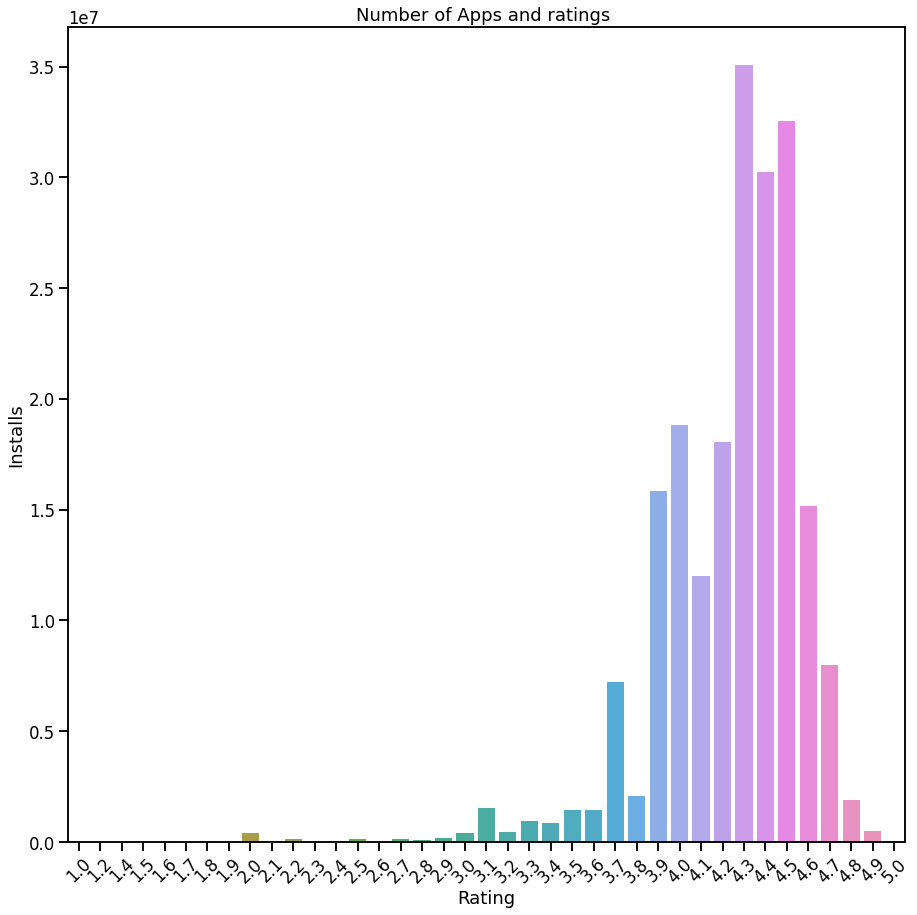

In [ ]:
#Ratings of Apps and the number of installed
plt.figure(figsize=(15,15))
sns.barplot(y='Installs',x='Rating',data=data,ci=None)
plt.xticks(rotation=45)
plt.title("Number of Apps and ratings ")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



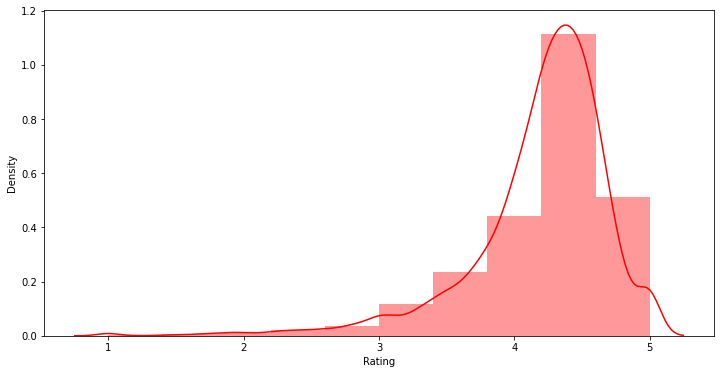

In [ ]:
#most reviewed app rating
plt.figure(figsize=(12,6))
sns.distplot(data["Rating"],bins=10,color="red")

Text(0.5, 0, '')

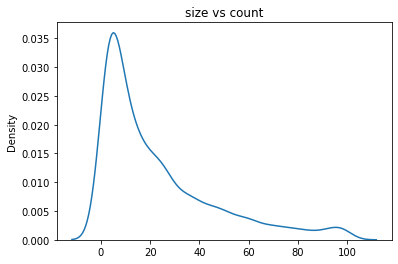

In [ ]:
sns.kdeplot(data=data["Size"])
plt.title("size vs count")
plt.xlabel("")

Text(0.5, 1.0, 'avg rating table based on category')

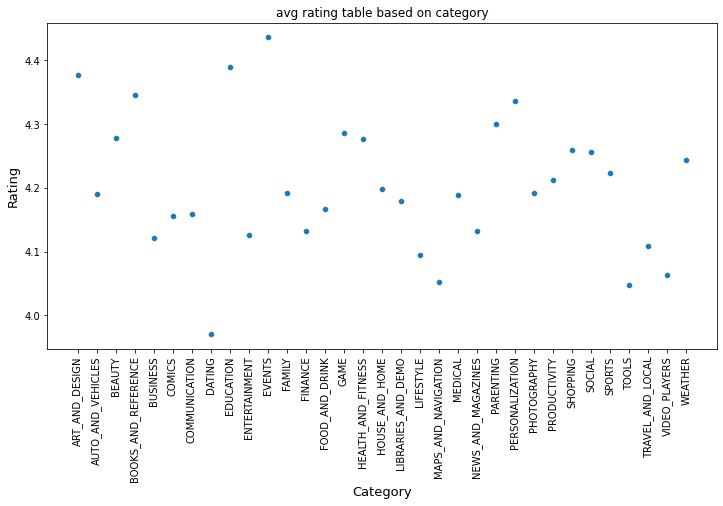

In [ ]:
plt.figure(figsize=(12,6))

sns.scatterplot(x = data.groupby('Category')['Rating'].mean().index, y = data.groupby('Category')['Rating'].mean().values)
plt.xlabel('Category', fontsize=13)
plt.ylabel('Rating', fontsize=13)
plt.xticks(rotation=90)
plt.title("avg rating table based on category")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

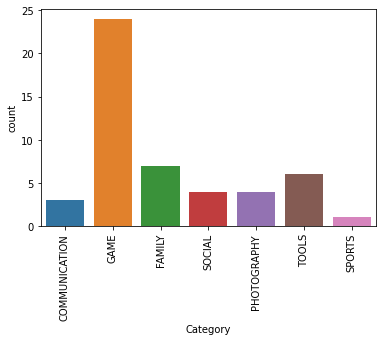

In [ ]:
most_popular_apps = data[(data["Reviews"]>10000000) ][ (data["Rating"]>=4.5)]
sns.countplot(most_popular_apps["Category"])
plt.xticks(rotation=90)

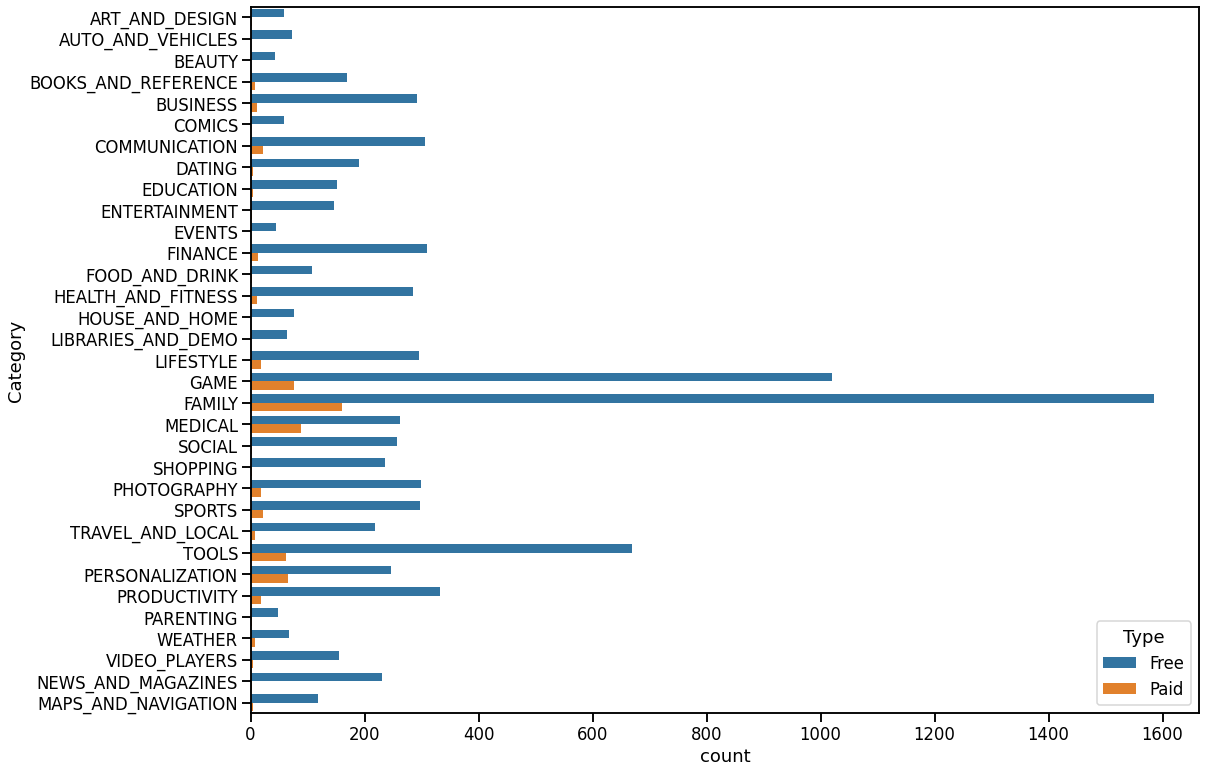

In [ ]:
sns.set_context('talk',font_scale=1)
plt.figure(figsize=(17,13))
sns.countplot(data=data,y="Category",hue="Type")

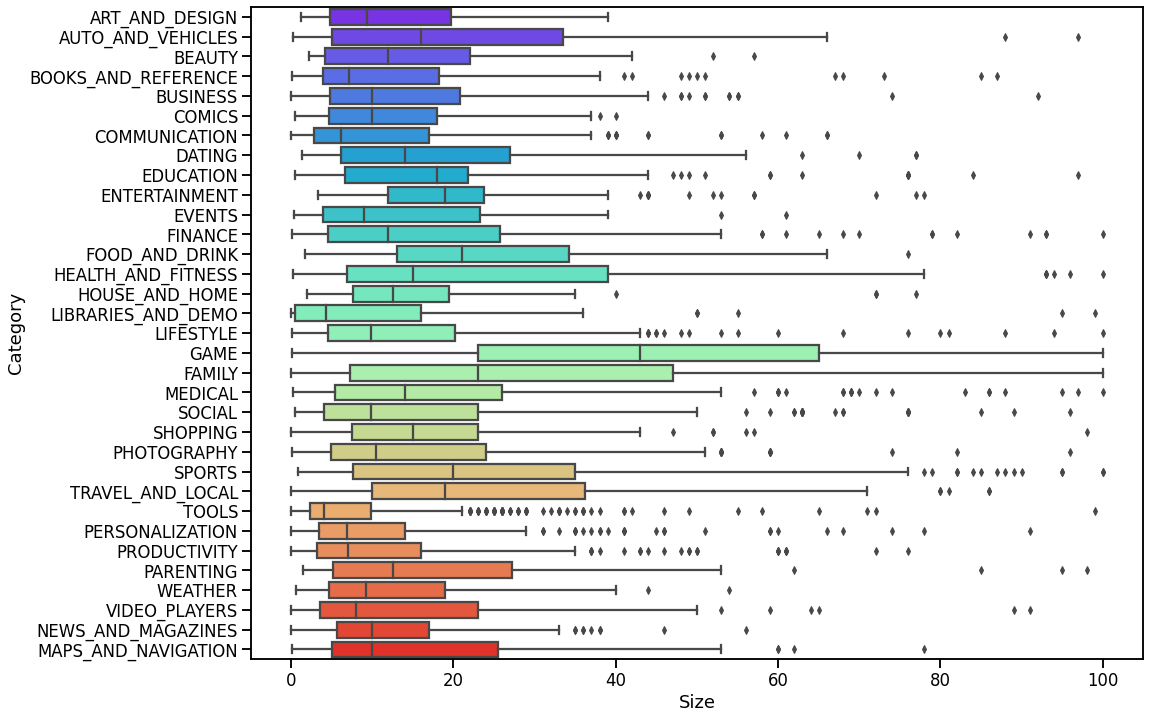

In [ ]:
plt.figure(figsize=(16,12))
sns.boxplot(data=data,x="Size",y="Category",palette='rainbow')

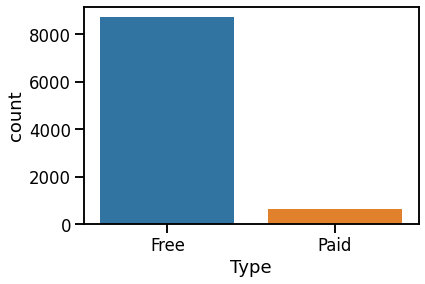

In [ ]:
sns.countplot(x=data["Type"])#either paid or free

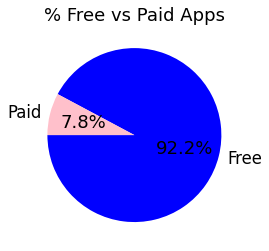

In [ ]:
# % free vs paid apps
size=[8895,753]
sentiment = ['Free', 'Paid']
colors = ['blue', 'pink']
plt.pie(size, labels=sentiment, colors=colors, startangle=180, autopct='%.1f%%')
plt.title('% Free vs Paid Apps')
plt.show()

Text(0.5, 0, 'no of apps')

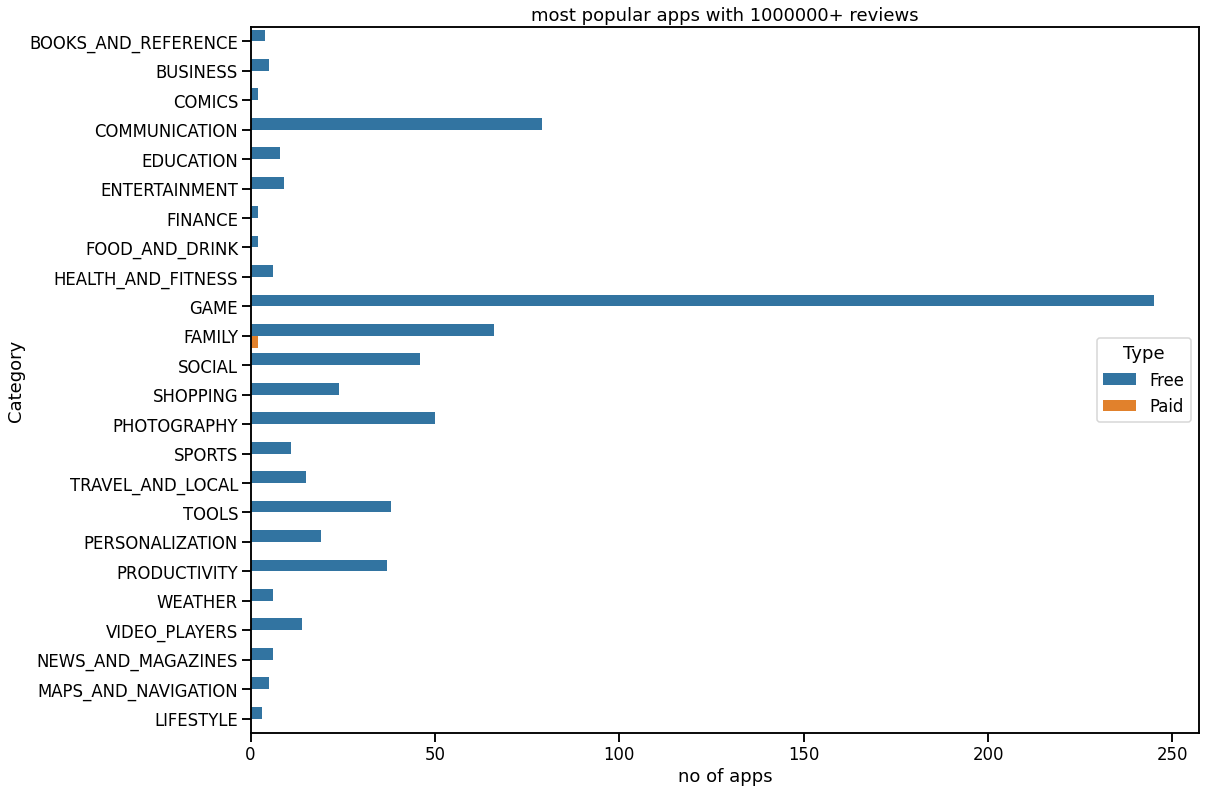

In [ ]:
plt.figure(figsize=(17,13))
sns.countplot(data=data[data["Reviews"]>1000000],y="Category",hue="Type")
plt.title("most popular apps with 1000000+ reviews")
plt.xlabel("no of apps")

Text(0.5, 1.0, 'apps with reviews graterthan 100000')

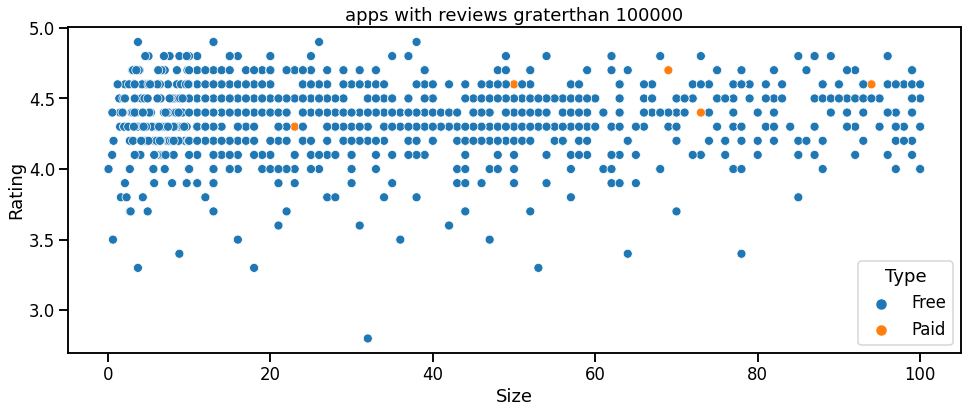

In [ ]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=data[data["Reviews"]>100000],x="Size",y="Rating",hue="Type")
plt.title("apps with reviews graterthan 100000")

In [ ]:
x=np.log(data["Installs"])
y=np.log(data["Reviews"])

In [ ]:
popular_apps = data[(data["Installs"]>10000000) & (data["Rating"]>=4.7)]
#the most popular paid apps with decent reviews and ratings
pd.DataFrame(popular_apps[popular_apps["Type"]=="Free"][["App"]])

,App
699,Duolingo: Learn Languages Free
784,Duolingo: Learn Languages Free
799,Duolingo: Learn Languages Free
826,Duolingo: Learn Languages Free
1360,Period Tracker - Period Calendar Ovulation Tra...
1677,Bubble Witch 3 Saga
1712,Toy Blast
1720,Bowmasters
1762,Bowmasters
1763,Piano Tiles 2™


In [ ]:
popular_apps = data[(data["Installs"]>100000) & (data["Rating"]>4.5)]
#the most popular paid apps with decent reviews and ratings
pd.DataFrame(popular_apps[popular_apps["Type"]=="Paid"][["App","Price"]])

,App,Price
853,Toca Life: City,277.0656
2151,Toca Life: City,277.0656
4034,Hitman Sniper,68.7456
4260,Cut the Rope GOLD,68.7456
5627,Five Nights at Freddy's 2,207.6256
5631,Five Nights at Freddy's,207.6256
6936,Hitman GO,68.7456
8449,Cameringo+ Filters Camera,207.6256
8804,DraStic DS Emulator,346.5056
8860,Bloons TD 5,207.6256


In [ ]:
#top20 most download paid apps
#Most download  Paid apps
df_type=data[data['Type']=='Paid']
df_type.sort_values(by='Installs',ascending=False)['App'].head(20)

2241                                            Minecraft
4347                                            Minecraft
4034                                        Hitman Sniper
7355                                              Threema
4260                                    Cut the Rope GOLD
2883                                  Facetune - For Free
7417                        Grand Theft Auto: San Andreas
9165    League of Stickman 2018- Ninja Arena PVP(Dream...
2950                                  Facetune - For Free
5631                              Five Nights at Freddy's
3403                                Beautiful Widgets Pro
2912                                  Facetune - For Free
2242                           Card Wars - Adventure Time
5578                              Sleep as Android Unlock
5490                                           True Skate
9151                              Lost Journey (Dreamsky)
9170                        Stickman Legends: Shadow Wars
8860          

In [ ]:
print("On analyzing the data, RATINGS of the app can be concluded as the most important parameter that plays an important role in depicting how better the app performs compared to the other apps in the market. It also hints on how well the company works on implementing the feedback given by the users. After all, users are the key to modern software businesses.")

On analyzing the data, RATINGS of the app can be concluded as the most important parameter that plays an important role in depicting how better the app performs compared to the other apps in the market. It also hints on how well the company works on implementing the feedback given by the users. After all, users are the key to modern software businesses.


In [ ]:
print("NOW LET'S PREDICT ACCURACY OF OUR RATING CATEGORY:")

NOW LET'S PREDICT ACCURACY OF OUR RATING CATEGORY:


In [5]:
cat_columns = ['Category','Type','Content Rating', 'Android Ver']
num_columns = ['Reviews','Size','Price', 'Installs']
def preprocess(data):
  preprocess_features = pd.DataFrame()
  for i in cat_columns:
    preprocess_features[i] = data[i] 
    preprocess_features[i] = preprocess_features[i].astype('category')
  preprocess_features = pd.get_dummies(preprocess_features[cat_columns], drop_first = 'True')
  for i in num_columns:
    preprocess_features[i] = data[i].astype('float')
  return preprocess_features
def preprocess_target(data):
  output_targets = data['Rating'].astype('float')
  return output_targets

In [ ]:
#Data after preprocessing
data =data.fillna(0)
preproc_data = preprocess(data)
target = preprocess_target(data)

In [ ]:
#Checking the shapes of the preprocessed data and the target variable 'Rating'
print(preproc_data.shape)
print(target.shape)

(9360, 72)
(9360,)


In [ ]:
# Splitting the Dataset into training and testing sets
####X_train - Predictor Variables for training
####y_train - Target variable for training
####X_test - Known predictor Variables for testing
####y_test - Target variable for testing

from sklearn.model_selection import train_test_split as ts
X_train, X_test, y_train, y_test = ts(preproc_data, target, test_size=0.3, random_state=101)

In [ ]:
#Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
#Fitting
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
import sklearn.metrics as metrics
pred1 = dt.predict(X_test)
mae_dt = metrics.mean_absolute_error(y_test,pred1)
mse_dt = metrics.mean_squared_error(y_test, pred1)
rmse_dt = np.sqrt(metrics.mean_squared_error(y_test, pred1))

print( mae_dt, mse_dt, rmse_dt)

0.39886039886039887 0.43390313390313395 0.6587132410261191


In [ ]:
#linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred2 = lr.predict(X_test)

mae_lr = metrics.mean_absolute_error(y_test,pred2)
mse_lr = metrics.mean_squared_error(y_test, pred2)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, pred2))

print( mae_lr, mse_lr, rmse_lr)

0.362985728099599 0.27076186375851896 0.520347829589515


In [ ]:
#random forest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=800)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
pred3 = rf.predict(X_test)

mae_rf = metrics.mean_absolute_error(y_test,pred3)
mse_rf = metrics.mean_squared_error(y_test, pred3)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, pred3))

print( mae_rf, mse_rf, rmse_rf)

0.31564675162800243 0.24942637490027333 0.4994260454764783


In [ ]:
a = np.array([mae_lr,mse_lr,rmse_lr])
b= np.array([mae_dt,mse_dt,mse_dt])
c= np.array([mae_rf,mse_rf,mse_rf])
x = pd.DataFrame(data =[a,b,c], columns = ['MAE','MSE','RMSE'], index = ['Multiple Linear Regression',  'Decision Tree Regression','Random Forest Regression'])
x

,MAE,MSE,RMSE
Multiple Linear Regression,0.362986,0.270762,0.520348
Decision Tree Regression,0.398860,0.433903,0.433903
Random Forest Regression,0.315647,0.249426,0.249426


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=800)

In [ ]:
rfr.fit(xtrain,ytrain)
ypre = rfr.predict(xtest)

df=pd.DataFrame()

df["ytest"]=pd.Series(ytest)

df["ypre"] =pd.Series(ypre)
df.sample(10)

,ytest,ypre
1001,4.8,4.573875
120,4.2,4.433750
125,4.4,4.401875
797,4.3,4.369875
1617,4.6,4.597500
1283,4.5,4.474375
851,4.0,4.098500
1527,4.5,4.398000
338,3.4,4.019000
1087,4.3,4.316250


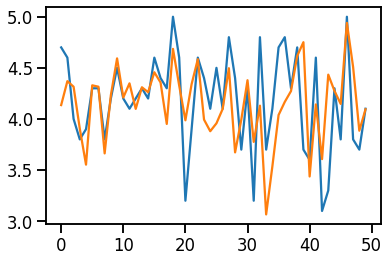

In [ ]:
y=ytest[0:50]
z=ypre[0:50]
fig, ax =plt.subplots()
ax.plot(y)
ax.plot(z)
plt.show()